In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
y_train = pd.read_csv('../data/y_train_processed.csv')
y_test = pd.read_csv('../data/y_test_processed.csv')

X_train = pd.read_csv('../data/x_train_processed.csv')
X_test = pd.read_csv('../data/x_test_processed.csv')

X_train_ss = pd.read_csv('../data/x_train_ss_processed.csv')
X_test_ss = pd.read_csv('../data/x_test_ss_processed.csv')

In [3]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=20)
selector.fit(X_train_ss, y_train)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X_train_ss.iloc[:,cols]


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [11] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [4]:
features_df_new

,cause_recoded_ord,sci_consensus_ord,harm_personally_ord,harm_US_ord,harm_dev_countries_ord,harm_future_gen_ord,harm_plants_animals_ord,when_harm_US_ord,educ_category_ord,reg_CO2_pollutant_ord,fund_research_ord,discuss_GW_ord,party_No party/not interested in politics,party_Republican,party_x_ideo_Liberal Democrat,party_x_ideo_Moderate/Conservative Democrat,party_x_ideo_No Party/Not Interested in politics,marit_status_Married,house_type_One-family house detached from any other house,service_attendance
0,0.292817,0.256712,-1.614592,-2.066116,-2.140823,0.520322,-0.259872,-0.244302,1.131387,0.592786,0.445366,-1.611867,-0.348963,-0.612706,1.960673,-0.510733,-0.348963,0.843649,0.620038,-0.623885
1,0.292817,0.952706,0.713491,0.580238,0.579085,0.520322,0.511553,-0.244302,1.131387,0.592786,0.445366,-1.611867,-0.348963,-0.612706,-0.510029,-0.510733,-0.348963,0.843649,0.620038,1.065607
2,0.292817,-0.263173,-1.614592,0.580238,0.579085,0.520322,0.511553,-0.244302,-0.947208,0.592786,0.445366,-1.611867,-0.348963,-0.612706,1.960673,-0.510733,-0.348963,0.843649,0.620038,-1.187049
3,0.292817,-0.263173,0.713491,0.580238,0.579085,0.520322,0.511553,-0.244302,0.092090,0.592786,0.445366,-1.611867,-0.348963,1.632105,-0.510029,-0.510733,-0.348963,0.843649,0.620038,1.628771
4,0.292817,0.952706,0.713491,0.580238,0.579085,0.520322,0.511553,-0.244302,-0.947208,0.592786,0.445366,0.620695,-0.348963,-0.612706,1.960673,-0.510733,-0.348963,-1.185328,0.620038,-0.623885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17691,0.292817,0.952706,0.713491,0.580238,0.579085,0.520322,0.511553,-0.244302,0.092090,0.592786,0.445366,0.620695,-0.348963,1.632105,-0.510029,-0.510733,-0.348963,0.843649,0.620038,1.628771
17692,0.292817,-1.479051,0.713491,0.580238,0.579085,0.520322,0.511553,1.180579,-0.947208,-1.767435,-2.276779,0.620695,-0.348963,-0.612706,-0.510029,1.957971,-0.348963,0.843649,0.620038,1.065607
17693,0.292817,-0.263173,-1.614592,-2.066116,-2.140823,-2.419830,-2.443249,-1.669184,0.092090,-1.767435,0.445366,0.620695,-0.348963,-0.612706,-0.510029,-0.510733,-0.348963,0.843649,0.620038,-0.060721
17694,0.292817,0.952706,0.713491,0.580238,0.579085,0.520322,0.511553,-0.244302,0.092090,-1.767435,-2.276779,0.620695,-0.348963,-0.612706,1.960673,-0.510733,-0.348963,0.843649,-1.612805,1.065607


In [5]:
cols

array([18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 31, 33, 35, 37, 39, 40,
       59, 73, 78])

In [6]:
X_train_ss_new = X_train_ss.iloc[:,cols]
X_test_ss_new = X_test_ss.iloc[:,cols]
removed_cols = [c for c in X_train_ss.columns if c not in X_train_ss_new.columns]
X_train_ss_removed = X_train_ss.loc[:,removed_cols]
X_test_ss_removed = X_test_ss.loc[:,removed_cols]

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5).fit(X_train_ss_removed)

In [8]:
pca.explained_variance_

array([4.77740373, 2.8625482 , 2.1423251 , 1.87698313, 1.69661968])

In [9]:
for i, l in enumerate(pca.explained_variance_):
    print('PC {}: {:.2f} --> {:.2f}%'.format(i, l,
                                             l * 100 / sum(pca.explained_variance_)))

PC 0: 4.78 --> 35.77%
PC 1: 2.86 --> 21.43%
PC 2: 2.14 --> 16.04%
PC 3: 1.88 --> 14.05%
PC 4: 1.70 --> 12.70%


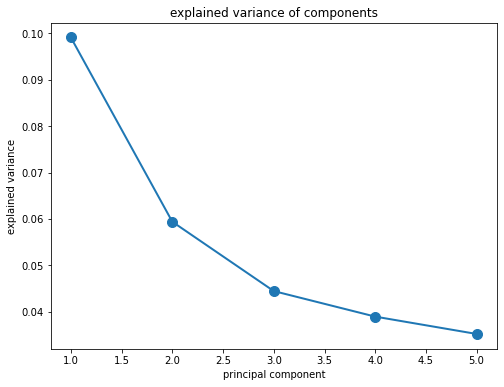

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,6), pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, 6), pca.explained_variance_ratio_, s=100)
ax.set_title('explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance');

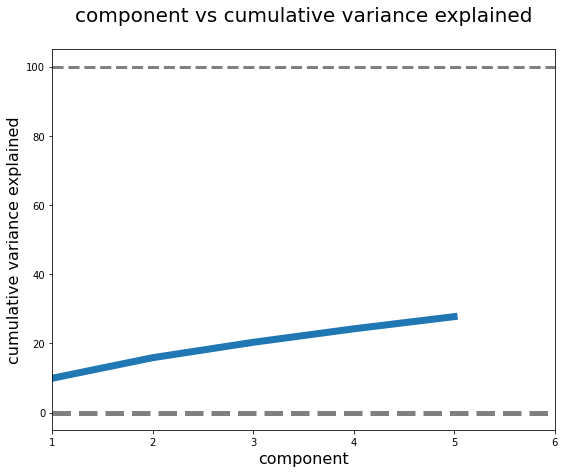

In [12]:
cum_var_exp = np.cumsum(pca.explained_variance_ratio_) * 100
plt.figure(figsize=(9,7))
component_number = range(1, 6)
plt.plot(component_number, cum_var_exp, lw=7)
plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')
ax = plt.gca()
ax.set_xlim([1,6])
ax.set_ylim([-5,105])
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)  
ax.set_title('component vs cumulative variance explained\n', fontsize=20);

In [13]:
pca.components_

array([[-3.93137349e-06, -2.82545894e-04,  9.31630893e-05,
         1.97743196e-04,  3.88439398e-05, -2.11019218e-04,
        -5.04155890e-04, -4.05736549e-04,  3.80156240e-03,
         1.28575381e-03,  1.30838409e-05, -4.93038066e-32,
         6.64551606e-03, -4.17961580e-01,  1.86450545e-01,
        -3.94150556e-01, -3.24292717e-02, -3.24512566e-02,
         3.95495195e-01, -5.88536378e-03, -4.10434637e-02,
        -6.46707494e-03, -1.35253775e-02, -1.57954938e-04,
        -5.43467563e-03, -7.21547504e-03,  2.30006138e-02,
         2.81083719e-02,  1.51056457e-03,  7.57987736e-03,
        -2.21087836e-02,  4.13074158e-03,  1.95755116e-02,
        -2.25425392e-02,  3.08063962e-02,  2.67599532e-02,
         6.79931140e-02,  1.45230665e-02,  5.61362824e-02,
         1.15148034e-02, -1.12117453e-01,  8.66920604e-02,
         1.73774162e-01,  1.74964753e-02, -1.44863048e-01,
         1.05570709e-01,  2.02323930e-02,  8.72961481e-02,
        -3.28011710e-01,  1.77988669e-01, -8.65934121e-0

In [14]:
pca.components_[0]

array([-3.93137349e-06, -2.82545894e-04,  9.31630893e-05,  1.97743196e-04,
        3.88439398e-05, -2.11019218e-04, -5.04155890e-04, -4.05736549e-04,
        3.80156240e-03,  1.28575381e-03,  1.30838409e-05, -4.93038066e-32,
        6.64551606e-03, -4.17961580e-01,  1.86450545e-01, -3.94150556e-01,
       -3.24292717e-02, -3.24512566e-02,  3.95495195e-01, -5.88536378e-03,
       -4.10434637e-02, -6.46707494e-03, -1.35253775e-02, -1.57954938e-04,
       -5.43467563e-03, -7.21547504e-03,  2.30006138e-02,  2.81083719e-02,
        1.51056457e-03,  7.57987736e-03, -2.21087836e-02,  4.13074158e-03,
        1.95755116e-02, -2.25425392e-02,  3.08063962e-02,  2.67599532e-02,
        6.79931140e-02,  1.45230665e-02,  5.61362824e-02,  1.15148034e-02,
       -1.12117453e-01,  8.66920604e-02,  1.73774162e-01,  1.74964753e-02,
       -1.44863048e-01,  1.05570709e-01,  2.02323930e-02,  8.72961481e-02,
       -3.28011710e-01,  1.77988669e-01, -8.65934121e-03,  1.78484788e-01,
        9.24423439e-02, -

In [17]:
# "new" columns -- PC's
pca_df = pd.DataFrame(pca.transform(X_train_ss_removed),
                      columns=['pc_' + str(i) for i in range(5)])
pca_df.head()

,pc_0,pc_1,pc_2,pc_3,pc_4
0,-3.588812,0.821127,0.675610,0.500045,-0.472175
1,-0.825395,1.978840,2.131024,-1.153419,1.215132
2,-2.224601,0.873193,-0.852401,0.832858,0.769180
3,1.249207,1.849252,1.910729,0.360287,0.239367
4,2.590523,0.573304,-1.875228,2.015352,0.783112


In [18]:
noise = pca_df.iloc[:,:5]

In [19]:
noise.head()

,pc_0,pc_1,pc_2,pc_3,pc_4
0,-3.588812,0.821127,0.675610,0.500045,-0.472175
1,-0.825395,1.978840,2.131024,-1.153419,1.215132
2,-2.224601,0.873193,-0.852401,0.832858,0.769180
3,1.249207,1.849252,1.910729,0.360287,0.239367
4,2.590523,0.573304,-1.875228,2.015352,0.783112


In [20]:
final_df_train = pd.concat([X_train_ss_new,noise],axis=1)

In [21]:
final_df_train.head()

,cause_recoded_ord,sci_consensus_ord,harm_personally_ord,harm_US_ord,harm_dev_countries_ord,harm_future_gen_ord,harm_plants_animals_ord,when_harm_US_ord,educ_category_ord,reg_CO2_pollutant_ord,...,party_x_ideo_Moderate/Conservative Democrat,party_x_ideo_No Party/Not Interested in politics,marit_status_Married,house_type_One-family house detached from any other house,service_attendance,pc_0,pc_1,pc_2,pc_3,pc_4
0,0.292817,0.256712,-1.614592,-2.066116,-2.140823,0.520322,-0.259872,-0.244302,1.131387,0.592786,...,-0.510733,-0.348963,0.843649,0.620038,-0.623885,-3.588812,0.821127,0.675610,0.500045,-0.472175
1,0.292817,0.952706,0.713491,0.580238,0.579085,0.520322,0.511553,-0.244302,1.131387,0.592786,...,-0.510733,-0.348963,0.843649,0.620038,1.065607,-0.825395,1.978840,2.131024,-1.153419,1.215132
2,0.292817,-0.263173,-1.614592,0.580238,0.579085,0.520322,0.511553,-0.244302,-0.947208,0.592786,...,-0.510733,-0.348963,0.843649,0.620038,-1.187049,-2.224601,0.873193,-0.852401,0.832858,0.769180
3,0.292817,-0.263173,0.713491,0.580238,0.579085,0.520322,0.511553,-0.244302,0.092090,0.592786,...,-0.510733,-0.348963,0.843649,0.620038,1.628771,1.249207,1.849252,1.910729,0.360287,0.239367
4,0.292817,0.952706,0.713491,0.580238,0.579085,0.520322,0.511553,-0.244302,-0.947208,0.592786,...,-0.510733,-0.348963,-1.185328,0.620038,-0.623885,2.590523,0.573304,-1.875228,2.015352,0.783112


In [22]:
pca.transform(X_test_ss_removed)

array([[ 0.46936048,  0.61215474,  2.19405588, -2.69982494, -0.56210154],
       [ 0.35632934,  1.1988697 , -0.05958312,  0.1420687 ,  0.58997672],
       [ 1.01131248, -0.50391586, -0.57571858,  1.09642011, -1.65337736],
       ...,
       [ 1.29610529, -3.49819955, -0.17224639, -2.35963587,  0.38852521],
       [ 0.48922406,  1.21938171, -0.21505964, -1.41710593, -1.93026847],
       [-3.5805145 , -0.6785323 ,  0.79620636, -1.10100799, -0.0646584 ]])

In [24]:
# "new" columns -- PC's
pca_df_test = pd.DataFrame(pca.transform(X_test_ss_removed),
                      columns=['pc_' + str(i) for i in range(5)])
pca_df_test.head()

,pc_0,pc_1,pc_2,pc_3,pc_4
0,0.469360,0.612155,2.194056,-2.699825,-0.562102
1,0.356329,1.198870,-0.059583,0.142069,0.589977
2,1.011312,-0.503916,-0.575719,1.096420,-1.653377
3,2.147698,-2.866511,-1.805139,0.802694,-2.495147
4,1.819325,4.182240,-0.950020,2.210075,-0.653630


In [25]:
final_df_test = pd.concat([X_test_ss_new,pca_df_test.iloc[:,:5]],axis=1)
final_df_test.head()

,cause_recoded_ord,sci_consensus_ord,harm_personally_ord,harm_US_ord,harm_dev_countries_ord,harm_future_gen_ord,harm_plants_animals_ord,when_harm_US_ord,educ_category_ord,reg_CO2_pollutant_ord,...,party_x_ideo_Moderate/Conservative Democrat,party_x_ideo_No Party/Not Interested in politics,marit_status_Married,house_type_One-family house detached from any other house,service_attendance,pc_0,pc_1,pc_2,pc_3,pc_4
0,0.292817,0.952706,0.713491,0.580238,0.579085,0.520322,0.511553,1.180579,1.131387,0.537174,...,-0.510733,-0.348963,-1.185328,0.620038,-0.623885,0.469360,0.612155,2.194056,-2.699825,-0.562102
1,0.292817,-0.263173,0.713491,0.580238,0.579085,0.520322,0.511553,1.180579,0.092090,0.592786,...,-0.510733,-0.348963,0.843649,0.620038,1.065607,0.356329,1.198870,-0.059583,0.142069,0.589977
2,0.292817,-0.263173,0.713491,0.580238,0.579085,0.520322,0.511553,-0.244302,-0.947208,0.592786,...,1.957971,-0.348963,-1.185328,0.620038,1.065607,1.011312,-0.503916,-0.575719,1.096420,-1.653377
3,0.292817,0.952706,0.713491,0.580238,0.579085,0.520322,0.511553,-0.244302,0.092090,0.592786,...,-0.510733,2.865636,-1.185328,-1.612805,-0.060721,2.147698,-2.866511,-1.805139,0.802694,-2.495147
4,0.292817,0.952706,0.713491,0.580238,-0.780869,0.520322,0.511553,-0.244302,-0.947208,0.592786,...,-0.510733,-0.348963,0.843649,0.620038,1.628771,1.819325,4.182240,-0.950020,2.210075,-0.653630
